# Problema de Negócios

O objetivo é identificar padrões de comportamento de compra dos clientes ao longo do tempo e analisar a retenção de clientes por meio da criação de cohorts. A empresa deseja responder a perguntas como:

Qual é a taxa de retenção de clientes ao longo dos meses?

Como o comportamento de compra varia entre diferentes cohorts ao longo dos meses?



# Dicionário de dados

Invoice: Número da fatura, identificador único para cada transação.

StockCode: Código do produto ou item no estoque.

Description: Descrição do produto ou item.

Quantity: Quantidade do produto comprado.

InvoiceDate: Data e hora da fatura (no formato datetime).

Price: Preço unitário do produto.

Customer ID: Identificador único do cliente.

Country: País onde a transação foi realizada.


fonte: https://archive.ics.uci.edu/dataset/502/online+retail+ii

In [ ]:
install.packages("tidyverse")
install.packages("readxl")
install.packages("writexl")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(tidyverse)
library(ggplot2)
library(readxl)
library(writexl)


In [ ]:
retail_2009_2010 <-readxl::read_excel("/content/online_retail_II.xlsx", sheet = "Year 2009-2010")
retail_2010_2011 <-readxl::read_excel("/content/online_retail_II.xlsx", sheet = "Year 2010-2011")

retail1 <- retail_2009_2010
retail2 <-retail_2010_2011

In [ ]:
retail_combined <- bind_rows(retail1, retail2)

In [ ]:
head(retail_combined)

Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
<chr>,<chr>,<chr>,<dbl>,<dttm>,<dbl>,<dbl>,<chr>
489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom
489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085,United Kingdom


In [ ]:
tail(retail_combined)

Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
<chr>,<chr>,<chr>,<dbl>,<dttm>,<dbl>,<dbl>,<chr>
581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France
581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France
581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680,France


In [ ]:
nrow(retail_combined)

[1] 1067371

# Limpeza de dados

### Verificando os valores nulos

In [ ]:
colSums(is.na(retail_combined))

Invoice   StockCode Description    Quantity InvoiceDate       Price 
          0           0        4382           0           0           0 
Customer ID     Country 
     243007           0

Existe muitos valores ausentes nos dados de cliente, infelizmente para minha análise preciso desses valores preenchidos, vou precisar excluir

In [ ]:
## Eliminando as linhas como valores ausentes na coluna CustomerID
retail_not_na <- drop_na(retail_combined, "Customer ID")

In [ ]:
colSums(is.na(retail_not_na))

Invoice   StockCode Description    Quantity InvoiceDate       Price 
          0           0           0           0           0           0 
Customer ID     Country 
          0           0

In [ ]:
nrow(retail_not_na)

[1] 824364

### Eliminando os valores duplicados

In [ ]:
## Verificando a qtd de linhas duplicadas
duplicated_rows <- retail_not_na[duplicated(retail_not_na), ]


nrow(duplicated_rows)

[1] 26479

In [ ]:
print(duplicated_rows)

# A tibble: 26,479 × 8
   Invoice StockCode Description              Quantity InvoiceDate         Price
   <chr>   <chr>     <chr>                       <dbl> <dttm>              <dbl>
 1 489517  21912     VINTAGE SNAKES & LADDERS        1 2009-12-01 11:34:00  3.75
 2 489517  22130     PARTY CONE CHRISTMAS DE…        6 2009-12-01 11:34:00  0.85
 3 489517  22319     HAIRCLIPS FORTIES FABRI…       12 2009-12-01 11:34:00  0.65
 4 489517  21913     VINTAGE SEASIDE JIGSAW …        1 2009-12-01 11:34:00  3.75
 5 489517  21821     GLITTER STAR GARLAND WI…        1 2009-12-01 11:34:00  3.75
 6 489517  84951A    S/4 PISTACHIO LOVEBIRD …        1 2009-12-01 11:34:00  2.55
 7 489517  21491     SET OF THREE VINTAGE GI…        1 2009-12-01 11:34:00  1.95
 8 489517  21912     VINTAGE SNAKES & LADDERS        1 2009-12-01 11:34:00  3.75
 9 489529  22028     PENNY FARTHING BIRTHDAY…       12 2009-12-01 11:51:00  0.42
10 489529  22036     DINOSAUR BIRTHDAY CARD         12 2009-12-01 11:51:00  0.42
# ℹ 2

In [ ]:
# Eliminar as duplicadas
retail_unique <- unique(retail_not_na)

In [ ]:
print(retail_unique)

# A tibble: 797,885 × 8
   Invoice StockCode Description              Quantity InvoiceDate         Price
   <chr>   <chr>     <chr>                       <dbl> <dttm>              <dbl>
 1 489434  85048     "15CM CHRISTMAS GLASS B…       12 2009-12-01 07:45:00  6.95
 2 489434  79323P    "PINK CHERRY LIGHTS"           12 2009-12-01 07:45:00  6.75
 3 489434  79323W    "WHITE CHERRY LIGHTS"          12 2009-12-01 07:45:00  6.75
 4 489434  22041     "RECORD FRAME 7\" SINGL…       48 2009-12-01 07:45:00  2.1 
 5 489434  21232     "STRAWBERRY CERAMIC TRI…       24 2009-12-01 07:45:00  1.25
 6 489434  22064     "PINK DOUGHNUT TRINKET …       24 2009-12-01 07:45:00  1.65
 7 489434  21871     "SAVE THE PLANET MUG"          24 2009-12-01 07:45:00  1.25
 8 489434  21523     "FANCY FONT HOME SWEET …       10 2009-12-01 07:45:00  5.95
 9 489435  22350     "CAT BOWL"                     12 2009-12-01 07:46:00  2.55
10 489435  22349     "DOG BOWL , CHASING BAL…       12 2009-12-01 07:46:00  3.75
# ℹ 

In [ ]:
summary(retail_unique)

   Invoice           StockCode         Description           Quantity       
 Length:797885      Length:797885      Length:797885      Min.   :-80995.0  
 Class :character   Class :character   Class :character   1st Qu.:     2.0  
 Mode  :character   Mode  :character   Mode  :character   Median :     5.0  
                                                          Mean   :    12.6  
                                                          3rd Qu.:    12.0  
                                                          Max.   : 80995.0  
  InvoiceDate                         Price           Customer ID   
 Min.   :2009-12-01 07:45:00.00   Min.   :    0.00   Min.   :12346  
 1st Qu.:2010-07-02 09:47:00.00   1st Qu.:    1.25   1st Qu.:13964  
 Median :2010-12-02 12:33:00.00   Median :    1.95   Median :15228  
 Mean   :2011-01-02 13:17:34.14   Mean   :    3.70   Mean   :15313  
 3rd Qu.:2011-07-31 15:50:00.00   3rd Qu.:    3.75   3rd Qu.:16788  
 Max.   :2011-12-09 12:50:00.00   Max.   :38970

Existe preço de compra com valores 0 e quantidades de produtos com valores negativos, provavelmente são extornos, não preciso desses dados já que quero analisar apenas as compras realizadas


In [ ]:
# Eliminar os valores negativos
retail_qtd_postivo <- retail_unique %>%
  filter(retail_unique$Quantity >= 0)

In [ ]:
nrow(retail_qtd_postivo)

[1] 779495

In [ ]:
# Eliminar os valores zeros
retail_price_sem_0 <- retail_qtd_postivo %>%
  filter(retail_qtd_postivo$Price > 0)

In [ ]:
nrow(retail_price_sem_0)

[1] 779425

### Verificando os StockCode

Verificar se há alguma sujeira nos Códigos de Estoque

In [ ]:
# Verificando os valores únicos da coluna
unique_stock_codes <- unique(retail_price_sem_0$StockCode)

# Ordenar os códigos de estoque em ordem alfabética decrescente
sorted_stock_codes <- sort(unique_stock_codes, decreasing = TRUE)

# Imprimir os códigos de estoque ordenados
print(sorted_stock_codes[1:150])

  [1] "TEST002"      "TEST001"      "SP1002"       "POST"         "PADS"        
  [6] "M"            "DOT"          "D"            "C2"           "BANK CHARGES"
 [11] "ADJUST2"      "ADJUST"       "90214Z"       "90214Y"       "90214W"      
 [16] "90214V"       "90214U"       "90214T"       "90214S"       "90214R"      
 [21] "90214P"       "90214O"       "90214N"       "90214M"       "90214L"      
 [26] "90214K"       "90214J"       "90214I"       "90214H"       "90214G"      
 [31] "90214F"       "90214E"       "90214D"       "90214C"       "90214B"      
 [36] "90214A"       "90212C"       "90212B"       "90211B"       "90211A"      
 [41] "90210D"       "90210C"       "90210B"       "90210A"       "90209C"      
 [46] "90209B"       "90209A"       "90208"        "90206C"       "90206A"      
 [51] "90205C"       "90205A"       "90204"        "90203"        "90202D"      
 [56] "90202C"       "90202B"       "90202A"       "90201D"       "90201C"      
 [61] "90201B"       "90201A

Há alguns códigos de estoque 'sujos' em que os pedidos não foram os padrões de clientes

In [ ]:
# Palavras sujas
dirty_words <- c("M", "D", "C2", "DOT", "POST", "PADS","TEST002","TEST001","SP1002","BANK CHARGES","ADJUST2","ADJUST" )

# Condição para os registros que você deseja remover
conditions_to_remove <- grepl(paste(dirty_words, collapse="|"), retail_price_sem_0$StockCode)

# Subconjunto do DataFrame excluindo os registros que contêm as palavras sujas
cleaned_data <- retail_price_sem_0[!conditions_to_remove, ]



In [ ]:
## Verificando se a limpeza foi feita
unique_stock_codes <- unique(cleaned_data$StockCode)

# Ordenar os códigos de estoque em ordem alfabética decrescente
sorted_stock_codes <- sort(unique_stock_codes, decreasing = TRUE)

# Imprimir os códigos de estoque ordenados
print(sorted_stock_codes[1:150])


  [1] "90214Z" "90214Y" "90214W" "90214V" "90214U" "90214T" "90214S" "90214R"
  [9] "90214P" "90214O" "90214N" "90214L" "90214K" "90214J" "90214I" "90214H"
 [17] "90214G" "90214F" "90214E" "90214C" "90214B" "90214A" "90212C" "90212B"
 [25] "90211B" "90211A" "90210C" "90210B" "90210A" "90209C" "90209B" "90209A"
 [33] "90208"  "90206C" "90206A" "90205C" "90205A" "90204"  "90203"  "90202C"
 [41] "90202B" "90202A" "90201C" "90201B" "90201A" "90200E" "90200C" "90200B"
 [49] "90200A" "90199C" "90199B" "90199A" "90198B" "90198A" "90197B" "90196B"
 [57] "90196A" "90195B" "90195A" "90194"  "90192"  "90191"  "90190C" "90190B"
 [65] "90190A" "90189B" "90189A" "90188"  "90187B" "90187A" "90186B" "90186A"
 [73] "90185C" "90185B" "90185A" "90184C" "90184B" "90184A" "90183C" "90183A"
 [81] "90182C" "90181A" "90180B" "90180A" "90179C" "90179B" "90179A" "90178B"
 [89] "90178A" "90177E" "90177C" "90177B" "90177A" "90176E" "90176C" "90176B"
 [97] "90176A" "90175C" "90175B" "90175A" "90174"  "90173"  "901

Dados limpos

In [ ]:
nrow(cleaned_data)

[1] 769632

# Registros de limpeza

Quantidade de Duplicatas removidas - 26479

Valores nulos em CustomerID removidos - 243007

Valores negativos na coluna Quantity - 18390

Valores negativos na coluna Price - 70

Valores sujos na coluna StockCode - 9793

Total de linhas removidas no dataframe - 297.739 de 1.067.371

Em um cenário real essa quantidade de perdas linhas é preocupante para a análise, mas nesse caso não tem como pedir pra alguém 'arrumar' o dataset, prosseguirei assim

# Salvando o novo dataset

In [ ]:
## Salvando um novo dataset limpo
retail <- cleaned_data

In [ ]:
# Baixar o Excel
writexl::write_xlsx(retail, "retail.xlsx")


In [ ]:
retail_2009_2011 <-readxl::read_excel("/content/retail.xlsx")

retail <- retail_2009_2011

# Análise Descritiva

## Descrições básicas do dataframe

In [ ]:
print(paste("O dataframe possui", nrow(retail), "linhas e", ncol(retail), "colunas."))

[1] "O dataframe possui 769632 linhas e 8 colunas."


In [ ]:
### Qual é o intervalo de datas ?
print(paste('Date range:', min(retail$InvoiceDate), '-', max(retail$InvoiceDate)))

[1] "Date range: 2009-12-01 07:45:00 - 2011-12-09 12:50:00"


## Valores únicos por coluna

In [ ]:
# Criar um dataframe vazio para armazenar os resultados
contagem <- data.frame(Variavel = character(), Contagens_Distintas = numeric(), stringsAsFactors = FALSE)

# Calcular a contagem de valores distintos e armazenar no dataframe 'contagem'
for (coluna in names(retail)) {

  dados <- data.frame(Variavel = coluna, Contagens_Distintas = length(unique(retail[[coluna]])), stringsAsFactors = FALSE)
  contagem <- rbind(contagem, dados)
}


print(contagem)

     Variavel Contagens_Distintas
1     Invoice               36557
2   StockCode                4488
3 Description                5087
4    Quantity                 433
5 InvoiceDate               34240
6       Price                 451
7 Customer ID                5850
8     Country                  41


## Análise estatística das variáveis

In [ ]:
summary(retail)

   Invoice           StockCode         Description           Quantity       
 Length:769632      Length:769632      Length:769632      Min.   :    1.00  
 Class :character   Class :character   Class :character   1st Qu.:    2.00  
 Mode  :character   Mode  :character   Mode  :character   Median :    6.00  
                                                          Mean   :   13.54  
                                                          3rd Qu.:   12.00  
                                                          Max.   :80995.00  
  InvoiceDate                         Price          Customer ID   
 Min.   :2009-12-01 07:45:00.00   Min.   :  0.030   Min.   :12346  
 1st Qu.:2010-07-05 09:58:00.00   1st Qu.:  1.250   1st Qu.:13979  
 Median :2010-12-02 19:18:00.00   Median :  1.950   Median :15252  
 Mean   :2011-01-03 16:36:56.30   Mean   :  2.938   Mean   :15326  
 3rd Qu.:2011-08-02 10:19:00.00   3rd Qu.:  3.750   3rd Qu.:16794  
 Max.   :2011-12-09 12:50:00.00   Max.   :649.500   M

As variáveis numéricas possuem discrepancias em suas médias e medianas o que acarreta alguns outliers

## Verificando Outliers

In [ ]:
# Função para identificar outliers em uma variável
detect_outliers <- function(column) {
  if (is.numeric(column)) {
    Q1 <- quantile(column, 0.25, na.rm = TRUE)
    Q3 <- quantile(column, 0.75, na.rm = TRUE)
    IQR <- Q3 - Q1
    lower_bound <- Q1 - 1.5 * IQR
    upper_bound <- Q3 + 1.5 * IQR
    outliers <- column[(column < lower_bound) | (column > upper_bound)]
    return(outliers)
  } else {
    return(NULL)
  }
}

# Listando para armazenar os outliers de cada variável
outliers_list <- list()

# Loop através das variáveis numéricas
for (col in names(retail)) {
  if (!(col %in% c())) {
    outliers <- detect_outliers(retail[[col]])
    if (!is.null(outliers) && length(outliers) > 0) {
      outliers_list[[col]] <- outliers
    }
  }
}

# Criando uma lista de dataframes com os outliers
outliers_df <- stack(outliers_list)

# Renomeando as colunas
colnames(outliers_df) <- c("Outlier", "Variable")

# Contando quantos outliers cada variável possui
contagem_outliers <- table(outliers_df$Variable)

# Criando um DataFrame com a contagem de outliers para cada variável
contagem_outliers_df <- data.frame(Variavel = names(contagem_outliers), Quantidade_de_Outliers = as.numeric(contagem_outliers))

# Exibindo a contagem de outliers para cada variável
print(contagem_outliers_df)

  Variavel Quantidade_de_Outliers
1 Quantity                  50751
2    Price                  62907


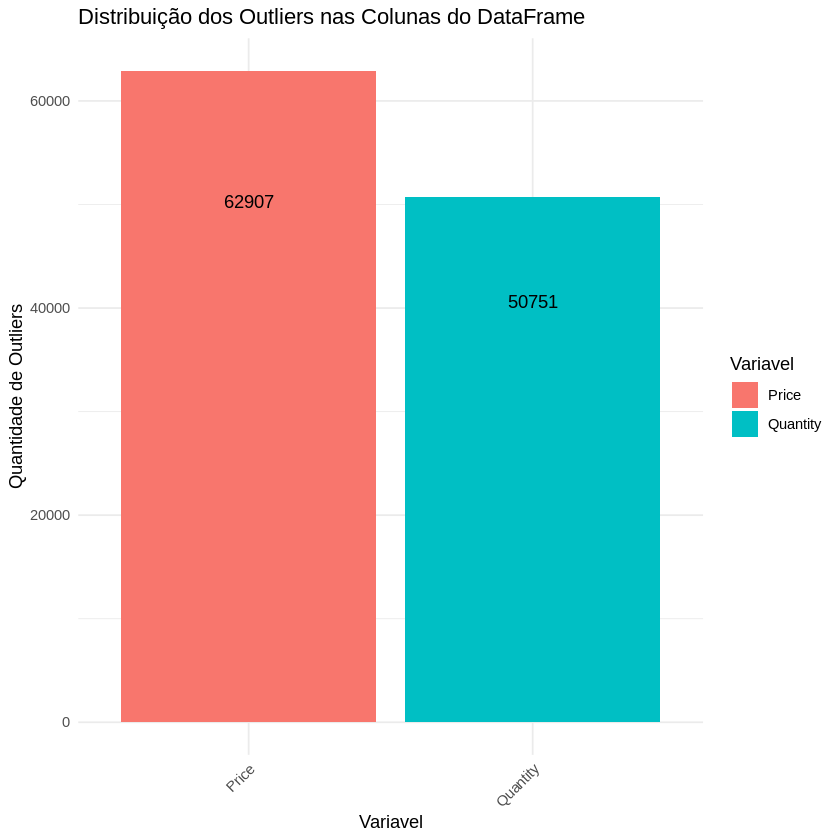

In [ ]:
# Criando um gráfico de barras com ggplot2
grafico <- ggplot(contagem_outliers_df, aes(x = Variavel, y = Quantidade_de_Outliers, fill = Variavel, label = Quantidade_de_Outliers)) +
  geom_bar(stat = "identity") +
  labs(title = "Distribuição dos Outliers nas Colunas do DataFrame",
       y = "Quantidade de Outliers") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  geom_text(position = position_stack(vjust = 0.8))


print(grafico)

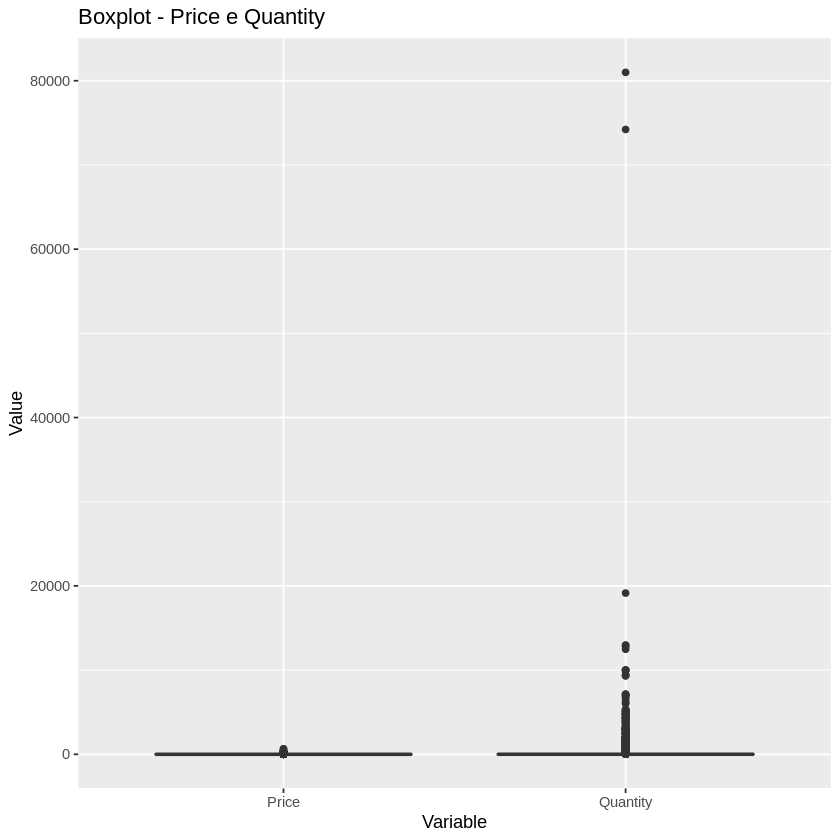

In [ ]:
# Selecionando apenas as colunas relevantes do seu dataframe
numeric_data <- retail %>%
  select(Price, Quantity)

# Mudando o formato dos dados para o gráfico
numeric_data_long <- numeric_data %>%
  pivot_longer(everything(), names_to = "Variable", values_to = "Value")

# Criando um boxplot único
boxplot_combined <- ggplot(data = numeric_data_long, aes(x = Variable, y = Value)) +
  geom_boxplot() +
  ggtitle("Boxplot - Price e Quantity")


print(boxplot_combined)

Tem duas compras com volume de compras extremamente grande

In [ ]:
# Verificando os maiores valores de quantidades
Max_quantity <- retail %>%
  arrange(desc(Quantity))

head(Max_quantity)

Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
<chr>,<chr>,<chr>,<dbl>,<dttm>,<dbl>,<dbl>,<chr>
581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom
541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom
497946,37410,BLACK AND WHITE PAISLEY FLOWER MUG,19152,2010-02-15 11:57:00,0.10,13902,Denmark
501534,21099,SET/6 STRAWBERRY PAPER CUPS,12960,2010-03-17 13:09:00,0.10,13902,Denmark
501534,21091,SET/6 WOODLAND PAPER PLATES,12960,2010-03-17 13:09:00,0.10,13902,Denmark
501534,21085,SET/6 WOODLAND PAPER CUPS,12744,2010-03-17 13:09:00,0.10,13902,Denmark


Dois pedidos extremamente grandes de "paper craft" e "ceramic", não parece ser um erro, como muito de seus clientes são atavadistas provavelmente alguma comprou essa qtd para revenda

# Análise de Cohort

In [ ]:
df_retail <- retail %>%
  mutate(InvoiceMonth = floor_date(InvoiceDate, "month"))

In [ ]:
df_retail <- df_retail %>%
  group_by(`Customer ID`) %>%
  mutate(Cohort = floor_date(min(InvoiceDate), "month"))


In [ ]:
head(df_retail)

Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceMonth,Cohort
<chr>,<chr>,<chr>,<dbl>,<dttm>,<dbl>,<dbl>,<chr>,<dttm>,<dttm>
489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,2009-12-01,2009-12-01
489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009-12-01,2009-12-01
489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009-12-01,2009-12-01
489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,2009-12-01,2009-12-01
489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,2009-12-01,2009-12-01
489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085,United Kingdom,2009-12-01,2009-12-01


In [ ]:
retail_cohort <- df_retail %>%
  group_by(Cohort, InvoiceMonth) %>%
  summarize(n_customers = n_distinct(`Customer ID`)) %>%
  ungroup()

`summarise()` has grouped output by 'Cohort'. You can override using the
`.groups` argument.


In [ ]:
head(retail_cohort)

Cohort,InvoiceMonth,n_customers
<dttm>,<dttm>,<int>
2009-12-01,2009-12-01,951
2009-12-01,2010-01-01,332
2009-12-01,2010-02-01,317
2009-12-01,2010-03-01,404
2009-12-01,2010-04-01,360
2009-12-01,2010-05-01,342


In [ ]:
retail_cohort <- retail_cohort %>%
  mutate(Period = as.numeric(interval(Cohort, InvoiceMonth) / months(1)))

In [ ]:
head(retail_cohort)

Cohort,InvoiceMonth,n_customers,Period
<dttm>,<dttm>,<int>,<dbl>
2009-12-01,2009-12-01,951,0
2009-12-01,2010-01-01,332,1
2009-12-01,2010-02-01,317,2
2009-12-01,2010-03-01,404,3
2009-12-01,2010-04-01,360,4
2009-12-01,2010-05-01,342,5


In [ ]:
retail_date <- retail_cohort %>%
  mutate(
    InvoiceMonth = format(InvoiceMonth, "%Y-%m"),
    Cohort = format(Cohort, "%Y-%m")
  )

In [ ]:
cohort_pivot <- retail_date %>%
  select(-InvoiceMonth) %>%
  pivot_wider(names_from = Period, values_from = n_customers) %>%
  select(Cohort, order(as.numeric(colnames(.))))

Warning message in order(as.numeric(colnames(.))):
“NAs introduced by coercion”


In [ ]:
head(cohort_pivot,25)

Cohort,0,1,2,3,4,5,6,7,8,⋯,15,16,17,18,19,20,21,22,23,24
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
2009-12,951,332,317,404,360,342,358,327,321,⋯,288,250,288,270,246,242,298,289,386,187
2010-01,368,79,118,116,100,114,99,86,105,⋯,56,90,75,71,74,93,73,93,21,NA
2010-02,374,88,85,109,91,73,72,107,96,⋯,75,59,60,54,85,86,62,22,NA,NA
2010-03,441,84,102,107,102,90,109,135,122,⋯,75,77,69,78,90,94,34,NA,NA,NA
2010-04,291,55,55,46,54,64,81,78,31,⋯,46,41,43,52,67,16,NA,NA,NA,NA
2010-05,257,42,45,45,47,65,55,32,15,⋯,32,36,42,39,12,NA,NA,NA,NA,NA
2010-06,267,47,50,55,62,76,34,24,22,⋯,33,35,54,13,NA,NA,NA,NA,NA,NA
2010-07,185,29,34,55,54,26,21,27,27,⋯,32,44,15,NA,NA,NA,NA,NA,NA,NA
2010-08,163,32,47,53,27,19,16,21,22,⋯,32,12,NA,NA,NA,NA,NA,NA,NA,NA


In [ ]:
cohort_size <- cohort_pivot[, 1:2]
cohort_size


Cohort,0
<chr>,<int>
2009-12,951
2010-01,368
2010-02,374
2010-03,441
2010-04,291
2010-05,257
2010-06,267
2010-07,185
2010-08,163


In [ ]:
# Dividir cada coluna de cohort_pivot pela segunda coluna de cohort_size
cohort_pct <- cohort_pivot
cohort_pct[, -1] <- round(cohort_pivot[, -1] / cohort_size[, rep(2, ncol(cohort_pivot) - 1)],4)


head(cohort_pct,25)

Cohort,0,1,2,3,4,5,6,7,8,⋯,15,16,17,18,19,20,21,22,23,24
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2009-12,1,0.3491,0.3333,0.4248,0.3785,0.3596,0.3764,0.3438,0.3375,⋯,0.3028,0.2629,0.3028,0.2839,0.2587,0.2545,0.3134,0.3039,0.4059,0.1966
2010-01,1,0.2147,0.3207,0.3152,0.2717,0.3098,0.2690,0.2337,0.2853,⋯,0.1522,0.2446,0.2038,0.1929,0.2011,0.2527,0.1984,0.2527,0.0571,NA
2010-02,1,0.2353,0.2273,0.2914,0.2433,0.1952,0.1925,0.2861,0.2567,⋯,0.2005,0.1578,0.1604,0.1444,0.2273,0.2299,0.1658,0.0588,NA,NA
2010-03,1,0.1905,0.2313,0.2426,0.2313,0.2041,0.2472,0.3061,0.2766,⋯,0.1701,0.1746,0.1565,0.1769,0.2041,0.2132,0.0771,NA,NA,NA
2010-04,1,0.1890,0.1890,0.1581,0.1856,0.2199,0.2784,0.2680,0.1065,⋯,0.1581,0.1409,0.1478,0.1787,0.2302,0.0550,NA,NA,NA,NA
2010-05,1,0.1634,0.1751,0.1751,0.1829,0.2529,0.2140,0.1245,0.0584,⋯,0.1245,0.1401,0.1634,0.1518,0.0467,NA,NA,NA,NA,NA
2010-06,1,0.1760,0.1873,0.2060,0.2322,0.2846,0.1273,0.0899,0.0824,⋯,0.1236,0.1311,0.2022,0.0487,NA,NA,NA,NA,NA,NA
2010-07,1,0.1568,0.1838,0.2973,0.2919,0.1405,0.1135,0.1459,0.1459,⋯,0.1730,0.2378,0.0811,NA,NA,NA,NA,NA,NA,NA
2010-08,1,0.1963,0.2883,0.3252,0.1656,0.1166,0.0982,0.1288,0.1350,⋯,0.1963,0.0736,NA,NA,NA,NA,NA,NA,NA,NA


In [ ]:
# Baixar o Excel
writexl::write_xlsx(cohort_pivot, "cohort_pivot.xlsx")

In [ ]:
# Baixar o Excel
writexl::write_xlsx(cohort_pct, "cohort_pct.xlsx")